# enviroment set-up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab 
import statsmodels.api as sm
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Problem 1.2

In [2]:
FILE_SOURCE = "https://raw.githubusercontent.com/Rotehut/mitx_sds_analysis/main/Module1_Review_Statistics_Correlation_Regression_Gradient%20Descent/HW/data_and%20materials/gamma-ray.csv?token=AM5AEFCMBNK3LIFSZGUGBGLBIWBRA"
df = pd.read_csv(FILE_SOURCE)
df

,seconds,count
0,116.0,0.0
1,112.0,0.0
2,160.0,0.0
3,51.5,0.0
4,102.0,1.0
...,...,...
95,38.7,1.0
96,41.8,0.0
97,81.7,0.0
98,88.3,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   seconds  100 non-null    float64
 1   count    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


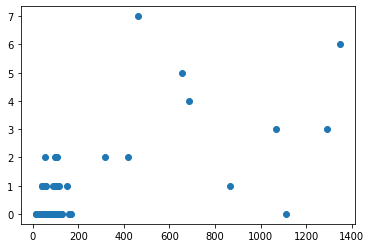

In [4]:
plt.scatter(df["seconds"], df["count"])

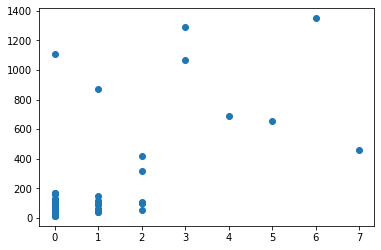

In [5]:
plt.scatter(df["count"], df["seconds"])

In [6]:
1-scipy.stats.chi2.cdf(123 , 99)

0.051444916997488765

In [7]:
G = np.array(df["count"])
t = np.array(df["seconds"])

In [8]:
l = G/t

In [9]:
l.shape

(100,)

In [10]:
u = np.array([])
b = np.array([])
for i in range(len(G)):
  u = np.append(u, scipy.stats.poisson.pmf(G[i], 0.0039))
  b = np.append(b, scipy.stats.poisson.pmf(G[i], l[i]))

-2*np.log(u.prod()/b.prod())

103.73607106898356

In [ ]:
# -2 * np.log((binom.pmf(63,31000,102/62000)*binom.pmf(39, 31000, 102/62000))/(binom.pmf(39,31000,39/31000)*binom.pmf(63,31000,63/31000)))

In [ ]:
1-scipy.stats.chi2.cdf(-2*np.log(u.prod()/b.prod()) , 99)

0.3525033297237604

In [ ]:
2*(1-scipy.stats.chi2.cdf(-2*np.log(u.prod()/b.prod()) , 99))

0.7050066594475208

In [ ]:
(1-scipy.stats.chi2.cdf(-2*np.log(u.prod()/b.prod()) , 99))/2

0.1762516648618802

# Problem 1.4

In [13]:
FILE_SOURCE = "https://raw.githubusercontent.com/Rotehut/mitx_sds_analysis/main/Module1_Review_Statistics_Correlation_Regression_Gradient%20Descent/HW/data_and%20materials/golub_data/golub.csv?token=AM5AEFGKCZC6EH2IAKEANF3BIWBYW"
golub_data = pd.read_csv(FILE_SOURCE)

In [14]:
golub_data

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
0,1,-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,-1.28137,-1.03209,-1.36149,-1.39979,0.17628,-1.40095,-1.56783,-1.20466,-1.24482,-1.60767,-1.06221,-1.12665,-1.20963,-1.48332,-1.25268,-1.27619,-1.23051,-1.43337,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
1,2,-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,-1.28137,-1.03209,-0.74005,-0.83161,0.41200,-1.27669,-0.74370,-1.20466,-1.02380,-0.38779,-1.06221,-1.12665,-1.20963,-1.12185,-0.65264,-1.27619,-1.23051,-1.18065,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
2,3,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,-0.39560,-0.62533,0.45181,1.09519,1.09318,0.34300,0.20010,0.38992,0.00641,1.10932,0.21952,-0.72267,0.51690,0.28577,0.61937,0.20085,0.29278,0.26624,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
3,4,3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,0.59110,3.26050,-1.36149,0.64180,2.32621,-1.40095,-1.56783,0.83502,-1.24482,-1.60767,-1.06221,3.69445,3.70837,-1.48332,2.36698,-1.27619,2.89604,0.71990,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
4,5,2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,-1.10133,2.59982,-1.36149,0.22853,2.34494,-1.40095,-1.56783,0.94532,-1.24482,-1.60767,-1.06221,3.52458,3.70837,-1.48332,1.79168,-1.27619,2.24892,0.02799,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,3047,0.04695,0.48704,0.72170,0.58403,0.30600,1.10563,0.59002,0.30773,0.46515,0.88991,0.40214,-0.24863,0.19678,-0.03138,0.34839,0.34602,0.54402,0.47598,0.07377,0.28150,0.57491,0.19498,1.07628,0.37532,0.01405,0.49138,0.74901,0.40676,0.39585,0.35006,0.32939,0.55791,0.11369,0.77377,-0.05275,0.93171,0.01243,0.86634
3047,3048,-0.20467,-0.07832,-1.00615,-0.88748,0.07175,-0.71376,-0.98900,-0.36098,-0.99075,-1.20668,-0.99634,-0.38832,0.11254,-0.63454,-0.33676,0.03590,-0.77623,0.66042,1.59055,-1.00802,-1.06221,-0.24490,-0.66182,-0.62739,0.25076,1.70638,-1.23051,0.15568,-0.13951,-0.01776,-0.57690,-0.13350,-0.33722,-1.04023,-0.71434,-0.08540,-0.30978,-0.24197
3048,3049,0.45231,0.42686,0.67579,0.31524,-0.57779,0.51322,0.89885,1.26549,0.24663,0.38565,0.44349,0.00557,0.35337,-0.05047,-0.80606,0.49199,0.82856,0.57640,0.36443,0.55919,-0.38991,1.07012,0.55371,0.26707,0.91343,0.68704,0.43196,0.65067,-0.13281,0.35006,0.32333,0.75559,1.22578,0.59945,0.72956,0.72762,1.10466,1.16990
3049,3050,-0.35920,-0.43633,0.34031,-0.90930,-0.36663,-0.07845,0.09493,-0.00563,-0.32967,-0.03974,-0.61829,-1.03209,-0.38459,-0.48585,-1.39503,0.01483,0.46683,-0.51358,-1.24482,-0.84620,-0.95002,0.20204,-0.03522,-0.20401,-1.25268,-0.22244,0.57291,-0.49941,-1.08902,-0.62199,-0.11319,-0.51073,-0.68539,0.23005,-0.17911,-0.37737,-0.39063,0.33975


In [16]:
FILE_SOURCE = "https://raw.githubusercontent.com/Rotehut/mitx_sds_analysis/main/Module1_Review_Statistics_Correlation_Regression_Gradient%20Descent/HW/data_and%20materials/golub_data/golub_cl.csv?token=AM5AEFBJMGHW5BS2TOJS5XDBIWB2Y"
golub_classnames = pd.read_csv(FILE_SOURCE)

In [17]:
golub_classnames

,Unnamed: 0,x
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [18]:
golub_data = golub_data.set_index(['Unnamed: 0'])
golub_classnames = golub_classnames.set_index(['Unnamed: 0'])

In [19]:
golub_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,-1.28137,-1.03209,-1.36149,-1.39979,0.17628,-1.40095,-1.56783,-1.20466,-1.24482,-1.60767,-1.06221,-1.12665,-1.20963,-1.48332,-1.25268,-1.27619,-1.23051,-1.43337,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
2,-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,-1.28137,-1.03209,-0.74005,-0.83161,0.41200,-1.27669,-0.74370,-1.20466,-1.02380,-0.38779,-1.06221,-1.12665,-1.20963,-1.12185,-0.65264,-1.27619,-1.23051,-1.18065,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
3,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,-0.39560,-0.62533,0.45181,1.09519,1.09318,0.34300,0.20010,0.38992,0.00641,1.10932,0.21952,-0.72267,0.51690,0.28577,0.61937,0.20085,0.29278,0.26624,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
4,3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,0.59110,3.26050,-1.36149,0.64180,2.32621,-1.40095,-1.56783,0.83502,-1.24482,-1.60767,-1.06221,3.69445,3.70837,-1.48332,2.36698,-1.27619,2.89604,0.71990,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
5,2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,-1.10133,2.59982,-1.36149,0.22853,2.34494,-1.40095,-1.56783,0.94532,-1.24482,-1.60767,-1.06221,3.52458,3.70837,-1.48332,1.79168,-1.27619,2.24892,0.02799,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,0.04695,0.48704,0.72170,0.58403,0.30600,1.10563,0.59002,0.30773,0.46515,0.88991,0.40214,-0.24863,0.19678,-0.03138,0.34839,0.34602,0.54402,0.47598,0.07377,0.28150,0.57491,0.19498,1.07628,0.37532,0.01405,0.49138,0.74901,0.40676,0.39585,0.35006,0.32939,0.55791,0.11369,0.77377,-0.05275,0.93171,0.01243,0.86634
3048,-0.20467,-0.07832,-1.00615,-0.88748,0.07175,-0.71376,-0.98900,-0.36098,-0.99075,-1.20668,-0.99634,-0.38832,0.11254,-0.63454,-0.33676,0.03590,-0.77623,0.66042,1.59055,-1.00802,-1.06221,-0.24490,-0.66182,-0.62739,0.25076,1.70638,-1.23051,0.15568,-0.13951,-0.01776,-0.57690,-0.13350,-0.33722,-1.04023,-0.71434,-0.08540,-0.30978,-0.24197
3049,0.45231,0.42686,0.67579,0.31524,-0.57779,0.51322,0.89885,1.26549,0.24663,0.38565,0.44349,0.00557,0.35337,-0.05047,-0.80606,0.49199,0.82856,0.57640,0.36443,0.55919,-0.38991,1.07012,0.55371,0.26707,0.91343,0.68704,0.43196,0.65067,-0.13281,0.35006,0.32333,0.75559,1.22578,0.59945,0.72956,0.72762,1.10466,1.16990


In [20]:
golub_classnames

,x
Unnamed: 0,
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [21]:
golub_data.iloc[[3-1]]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,-0.3956,-0.62533,0.45181,1.09519,1.09318,0.343,0.2001,0.38992,0.00641,1.10932,0.21952,-0.72267,0.5169,0.28577,0.61937,0.20085,0.29278,0.26624,-0.43377,-0.10823,-0.29385,0.05067,1.6943,-0.12472,0.04609,0.24347,0.90774,0.46509


## not use section

In [ ]:
# X_ALL_3
golub_data.iloc[: , :27].to_numpy()[3-1].mean()

0.26657777777777775

In [ ]:
X_ALL = []
for i in range(3051):
  X_ALL.append(golub_data.iloc[: , :27].to_numpy()[i+1-1].mean())

In [ ]:
X_ALL = np.array(X_ALL)
X_ALL

array([-1.27151037, -0.9098137 ,  0.26657778, ...,  0.40378296,
       -0.37103407, -0.67668741])

In [ ]:
# X_AML_3
golub_data.iloc[: , 27:].to_numpy()[3-1].mean()

0.2466390909090909

In [ ]:
X_AML = []
for i in range(3051):
  X_AML.append(golub_data.iloc[: , 27:].to_numpy()[i+1-1].mean())
X_AML = np.array(X_AML)
X_AML

array([-0.77924727, -0.69194182,  0.24663909, ...,  0.68216455,
       -0.35427636,  0.41675636])

In [ ]:
N_ALL = 27
N_AML = 11

In [ ]:
S2_ALL = []
for i in range(3051):
  # S2_ALL.append(np.square(golub_data.iloc[: , :27].to_numpy()[i+1-1].std(ddof = 1)))
  S2_ALL.append(np.square(golub_data.iloc[: , :27].to_numpy()[i+1-1].std()))
S2_ALL = np.array(S2_ALL)
S2_barXALL = S2_ALL/N_ALL

In [ ]:
S2_AML = []
for i in range(3051):
  # S2_AML.append(np.square(golub_data.iloc[: ,27:].to_numpy()[i+1-1].std(ddof = 1)))
  S2_AML.append(np.square(golub_data.iloc[: ,27:].to_numpy()[i+1-1].std()))
S2_AML = np.array(S2_AML)
S2_barXAML = S2_AML/N_AML

In [ ]:
delX = X_ALL - X_AML

In [ ]:
S2_delX = S2_barXALL + S2_barXAML

In [ ]:
S2_delX

array([0.07138986, 0.05246228, 0.03803864, ..., 0.02118213, 0.02385136,
       0.10084725])

In [ ]:
t_welch = delX/np.sqrt(S2_delX)

In [ ]:
# similar to the t-test statistic, and is itself known as the Welch unequal variances t-test.

In [ ]:
v_ALL = N_ALL -1
v_AML = N_AML -1

In [ ]:
v = np.square(S2_delX)/(np.square(S2_barXALL)/v_ALL+np.square(S2_barXAML)/v_AML)

In [ ]:
p = []
for i in range(3051):
  p_i = 1 - scipy.stats.t.cdf(t_welch[i], v[i])
  # p_i = 2*p_i
  p.append(p_i)
p = np.array(p)

In [ ]:
a = np.array([1, 2, 0, 5, -1])
b = (a < 2)

In [ ]:
b

array([ True, False,  True, False,  True])

In [ ]:
np.count_nonzero(b)

3

In [ ]:
np.count_nonzero(p<0.025)

655

In [ ]:
#630 fail
#746 fail

In [ ]:
# need to try 655
# need to try 770

In [ ]:
golub_data.iloc[: , :27].to_numpy()[3-1].shape

(27,)

In [ ]:
 golub_data.iloc[: ,27:].to_numpy()[3-1].shape

(11,)

## real use section

In [22]:
t_stats_list = []
p_value_list = []
for i in range(3051):
  t_stats,p_value = scipy.stats.ttest_ind(golub_data.iloc[: , :27].to_numpy()[i+1-1], golub_data.iloc[: ,27:].to_numpy()[i+1-1],equal_var=False)
  t_stats_list.append(t_stats)
  p_value_list.append(p_value)

In [23]:
p_value_list = np.array(p_value_list)
p_value_list

array([0.10616891, 0.38009143, 0.92321112, ..., 0.07937277, 0.91749659,
       0.00626195])

In [24]:
np.count_nonzero(p_value_list<0.05)

1078

In [25]:
p_value_list.sort()

In [26]:
p_value_list

array([2.78097119e-12, 1.53681858e-09, 8.42367885e-09, ...,
       9.98546807e-01, 9.99773937e-01, 9.99839873e-01])

In [27]:
# Holm-Bonferroni
H = []
for i in range(3051):
  if p_value_list[i] <= 0.05/(3051-(i)):
    H.append(True)
  else:
    break
H = np.array(H)

In [28]:
np.count_nonzero(H)

103

In [29]:
# Benjamini-Hochberg Correction
B = []
for i in range(3051):
  if p_value_list[i] <= 0.05*(i+1)/3051:
    B.append(True)
  else:
    break
B = np.array(B)

In [30]:
np.count_nonzero(B)

695

# Problem 1.6


In [31]:
FILE_SOURCE = "https://raw.githubusercontent.com/Rotehut/mitx_sds_analysis/main/Module1_Review_Statistics_Correlation_Regression_Gradient%20Descent/HW/data_and%20materials/syn_X.csv?token=AM5AEFAOR2UHSXU3YI7EUFLBIWCP2"
df_X = pd.read_csv(FILE_SOURCE, names=['X_1', 'X_2'], header=None)
df_X

,X_1,X_2
0,0.537670,0.84038
1,1.833900,-0.88803
2,-2.258800,0.10009
3,0.862170,-0.54453
4,0.318770,0.30352
...,...,...
95,0.187330,0.82606
96,-0.082494,1.52700
97,-1.933000,0.46691
98,-0.438970,-0.20971


In [33]:
FILE_SOURCE = "https://raw.githubusercontent.com/Rotehut/mitx_sds_analysis/main/Module1_Review_Statistics_Correlation_Regression_Gradient%20Descent/HW/data_and%20materials/syn_y.csv?token=AM5AEFA77BV2RVFG5G2V3CDBIWCS2"
df_y = pd.read_csv(FILE_SOURCE, header=None)
df_y

,0
0,-1.04490
1,7.68190
2,-0.68642
3,5.63850
4,1.08430
...,...
95,-1.52790
96,-6.21350
97,-2.13020
98,1.32070


In [34]:
np.array(df_X["X_1"]).shape

(100,)

In [35]:
Ys = np.array(df_y[0])
Ys

array([ -1.0449 ,   7.6819 ,  -0.68642,   5.6385 ,   1.0843 ,   3.3899 ,
        -0.59445,  -1.3867 ,  -1.4906 ,   6.1239 ,   9.7367 ,  10.261  ,
        -3.6631 ,   6.5071 ,  -1.8226 ,   0.60871,  -4.7102 ,  12.475  ,
         5.3455 ,   9.0114 , -10.812  ,  -2.3607 ,  -2.7273 ,   8.6033 ,
         3.9424 ,   4.2454 ,  -2.1486 ,   3.0243 ,  -0.93487,  10.51   ,
         4.8543 ,   3.7043 ,   7.3401 ,  -1.6278 ,  -3.056  ,   3.4151 ,
         8.398  ,  -5.4942 ,   1.84   ,   1.9132 ,   1.241  ,   3.3561 ,
        10.434  ,   3.6464 ,   4.7945 ,   5.5878 ,   6.9637 ,   5.9562 ,
        12.373  ,  -0.98722,  -1.7437 ,   2.1675 ,   0.8157 ,   4.4687 ,
        -2.7787 ,   4.3204 ,   5.3036 ,  -4.7648 ,   3.8555 ,   6.1602 ,
         2.515  ,   5.0227 ,   7.4086 ,  -8.1853 ,  -3.3853 ,  -0.11589,
         6.1029 ,   4.3974 ,   1.5536 ,   1.5854 ,   7.4188 ,  13.923  ,
         8.7931 ,   1.2401 ,  -0.55038,  -2.1875 ,   0.21854,   2.2216 ,
         3.9299 ,  -2.1418 ,  10.286  ,   0.59956, 

In [36]:
Xmat = np.array((np.ones_like(np.array(df_X["X_1"])), np.array(df_X["X_1"]), np.array(df_X["X_2"]))).T
Xmat

array([[ 1.       ,  0.53767  ,  0.84038  ],
       [ 1.       ,  1.8339   , -0.88803  ],
       [ 1.       , -2.2588   ,  0.10009  ],
       [ 1.       ,  0.86217  , -0.54453  ],
       [ 1.       ,  0.31877  ,  0.30352  ],
       [ 1.       , -1.3077   , -0.60033  ],
       [ 1.       , -0.43359  ,  0.48997  ],
       [ 1.       ,  0.34262  ,  0.73936  ],
       [ 1.       ,  3.5784   ,  1.7119   ],
       [ 1.       ,  2.7694   , -0.19412  ],
       [ 1.       , -1.3499   , -2.1384   ],
       [ 1.       ,  3.0349   , -0.83959  ],
       [ 1.       ,  0.7254   ,  1.3546   ],
       [ 1.       , -0.063055 , -1.0722   ],
       [ 1.       ,  0.71474  ,  0.96095  ],
       [ 1.       , -0.20497  ,  0.12405  ],
       [ 1.       , -0.12414  ,  1.4367   ],
       [ 1.       ,  1.4897   , -1.9609   ],
       [ 1.       ,  1.409    , -0.1977   ],
       [ 1.       ,  1.4172   , -1.2078   ],
       [ 1.       ,  0.6715   ,  2.908    ],
       [ 1.       , -1.2075   ,  0.82522  ],
       [ 1

In [37]:
Ys = np.array(df_y[0])[np.newaxis].T
# Concatenate the variables into a matrix, np.ones_like inserts a row of ones into the start of the matrix for the intercept term.
# Taking the transpose places each variable as columns.
Xmat = np.array((np.ones_like(np.array(df_X["X_1"])), np.array(df_X["X_1"]), np.array(df_X["X_2"]))).T
# import numpy.linalg
# The beta estimator using the matrix inversion formula
betaVec = np.linalg.inv(Xmat.T.dot(Xmat)).dot(Xmat.T).dot(Ys)

In [38]:
betaVec

array([[ 1.92960603],
       [ 1.26397096],
       [-4.59799331]])

## not use part

In [ ]:
# gradient_descent(X, y, step_size, precision)
precision = 0.000001
y = Ys
X = Xmat
w = np.array([0, 0, 0]).T
step_size = 1 #
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter


# update step
w = w + 2*step_size*np.matmul((y-np.matmul(X,w)),X.T).sum()


In [ ]:
y = Ys[np.newaxis].T
X = Xmat
w = np.array([0, 0, 0])[np.newaxis].T
step_size = 0.1
precision = 0.001

In [ ]:
for i in range(10000):
  w_last = w
  w = w + 2*step_size*np.matmul(X.T,y - np.matmul(X,w))
  if w_last.T.dot(w_last)-w.T.dot(w)< precision:
    break

In [ ]:
w

array([[ 48.387316  ],
       [ 31.74877795],
       [-93.27433504]])

In [ ]:
X.shape

(100, 3)

In [ ]:
w.shape

(3, 1)

In [ ]:
X[5]

array([ 1.     , -1.3077 , -0.60033])

In [ ]:
w.T.dot(w)

array([[14]])

## test

In [39]:
X = 2 * np.random.rand(100,2)
y = 4 +3 * 2 * np.random.rand(100,1)+np.random.randn(100,1)

In [ ]:
# https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c

In [40]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[ 7.73380624]
 [-1.00411286]
 [ 0.45656643]]


In [41]:
def gradient_descent(X,y,theta,step_size=0.01,iterations=100, precision=0.000001):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    # theta_history = np.zeros((iterations,3))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        last_theta = theta
        theta = theta -2*step_size*( X.T.dot((prediction - y)))
        # theta_history[it,:] =theta.T
        r = np.sum(np.square(last_theta-theta))
        if r < precision:
          break
        # cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, it

In [44]:
step_size =0.001
n_iter = 10000

theta = np.zeros((3,1))

X_b = np.c_[np.ones((len(X),1)),X]
theta, it = gradient_descent(X_b,y,theta,step_size,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f},\nTheta2:          {:0.3f}'.format(theta[0][0],theta[1][0], theta[2][0]))
print(it)

Theta0:          7.696,
Theta1:          -0.985,
Theta2:          0.469
226


## Part (c)

In [50]:
step_size =0.004 #the answer is here
n_iter = 10000

theta = np.zeros((3,1))

Ys
Xmat
theta, it = gradient_descent(Xmat,Ys,theta,step_size,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f},\nTheta2:          {:0.3f}'.format(theta[0][0],theta[1][0], theta[2][0]))
print(it)

Theta0:          1.930,
Theta1:          1.264,
Theta2:          -4.598
6


## Part (d)

In [51]:
def featureNormalize(data):
    mean = np.mean(data , axis=0 )
    std = np.std(data , axis=0 )
    norm = ( data - mean ) / std
    return norm

In [52]:
FILE_SOURCE = "https://raw.githubusercontent.com/Rotehut/mitx_sds_analysis/main/Module1_Review_Statistics_Correlation_Regression_Gradient%20Descent/HW/data_and%20materials/mortality.csv?token=AM5AEFGEVTYEZYTGUNGL3SDBIWDCY"
df = pd.read_csv(FILE_SOURCE)
df

,City,Mortality,JanTemp,JulyTemp,RelHum,Rain,Educ,Dens,NonWhite,WhiteCollar,Pop,House,Income,HC,NOx,SO2
0,"Akron, OH",921.87,27,71,59,36,11.4,3243,8.8,42.6,660328,3.34,29560,21,15,59
1,"Albany-Schenectady-Troy, NY",997.87,23,72,57,35,11.0,4281,3.5,50.7,835880,3.14,31458,8,10,39
2,"Allentown, Bethlehem,PA-NJ",962.35,29,74,54,44,9.8,4260,0.8,39.4,635481,3.21,31856,6,6,33
3,"Atlanta, GA",982.29,45,79,56,47,11.1,3125,27.1,50.2,2138231,3.41,32452,18,8,24
4,"Baltimore, MD",1071.29,35,77,55,43,9.6,6441,24.4,43.7,2199531,3.44,32368,43,38,206
5,"Birmingham, AL",1030.38,45,80,54,53,10.2,3325,38.5,43.1,883946,3.45,27835,30,32,72
6,"Boston, MA",934.70,30,74,56,43,12.1,4679,3.5,49.2,2805911,3.23,36644,21,32,62
7,"Bridgeport-Milford, CT",899.53,30,73,56,45,10.6,2140,5.3,40.4,438557,3.29,47258,6,4,4
8,"Buffalo, NY",1001.90,24,70,61,36,10.5,6582,8.1,42.5,1015472,3.31,31248,18,12,37
9,"Canton, OH",912.35,27,72,59,36,10.7,4213,6.7,41.0,404421,3.36,29089,12,7,20


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         59 non-null     object 
 1   Mortality    59 non-null     float64
 2   JanTemp      59 non-null     int64  
 3   JulyTemp     59 non-null     int64  
 4   RelHum       59 non-null     int64  
 5   Rain         59 non-null     int64  
 6   Educ         59 non-null     float64
 7   Dens         59 non-null     int64  
 8   NonWhite     59 non-null     float64
 9   WhiteCollar  59 non-null     float64
 10  Pop          59 non-null     int64  
 11  House        59 non-null     float64
 12  Income       59 non-null     int64  
 13  HC           59 non-null     int64  
 14  NOx          59 non-null     int64  
 15  SO2          59 non-null     int64  
dtypes: float64(5), int64(10), object(1)
memory usage: 7.5+ KB


In [54]:
y = featureNormalize(np.array(df["Mortality"])[np.newaxis].T)
y

array([[-3.11892494e-01],
       [ 9.16091089e-01],
       [ 3.42170341e-01],
       [ 6.64354454e-01],
       [ 2.10238786e+00],
       [ 1.44137722e+00],
       [-1.04589476e-01],
       [-6.72855036e-01],
       [ 9.81206534e-01],
       [-4.65713595e-01],
       [ 1.23504367e+00],
       [ 1.35267157e+00],
       [ 4.73370692e-01],
       [ 7.23491558e-01],
       [ 2.85456888e-01],
       [-1.30995231e+00],
       [-7.98682275e-02],
       [-1.12139220e+00],
       [ 2.91596806e-01],
       [ 1.12282174e-04],
       [-1.12834000e+00],
       [ 4.83873183e-01],
       [-8.67716642e-01],
       [ 1.83501936e-01],
       [ 4.44286870e-01],
       [-3.46469926e-01],
       [-1.56928305e+00],
       [-1.29120940e+00],
       [ 7.76973475e-01],
       [ 1.05537028e+00],
       [-1.28830102e+00],
       [-1.94264593e-01],
       [-1.35002335e+00],
       [ 3.20519051e-01],
       [-2.89918051e-01],
       [ 2.77890987e+00],
       [ 8.64063363e-01],
       [ 1.19319528e+00],
       [ 8.0

In [55]:

Xmat = np.array((np.ones_like(np.array(df[df.columns[2]]))))[np.newaxis].T

for i in df.columns[2:]:
  Xmat = np.append(Xmat, featureNormalize(np.array(df[i])[np.newaxis].T), axis=1)
Xmat.shape

(59, 15)

In [56]:
Xmat

array([[ 1.00000000e+00, -6.75237292e-01, -7.46670361e-01,
         2.35101963e-01, -2.18605083e-01,  5.14438040e-01,
        -4.66966802e-01, -3.44834185e-01, -7.53287401e-01,
        -5.08767233e-01,  5.14924937e-01, -8.31260402e-01,
        -1.90250515e-01, -1.72170990e-01,  6.88609529e-02],
       [ 1.00000000e+00, -1.07263380e+00, -5.27498464e-01,
        -1.39790356e-01, -3.05751703e-01,  4.01904719e-02,
         2.59202028e-01, -9.38936937e-01,  8.58154179e-01,
        -3.93923378e-01, -5.87818123e-01, -4.03303441e-01,
        -3.31785089e-01, -2.80235761e-01, -2.48545002e-01],
       [ 1.00000000e+00, -4.76539036e-01, -8.91546700e-02,
        -7.02128834e-01,  4.78567883e-01, -1.38255223e+00,
         2.44510752e-01, -1.24159306e+00, -1.38990630e+00,
        -5.25021820e-01, -2.01858052e-01, -3.13563257e-01,
        -3.53559639e-01, -3.66687578e-01, -3.43766789e-01],
       [ 1.00000000e+00,  1.11304701e+00,  1.00670482e+00,
        -3.27236516e-01,  7.40007746e-01,  1.58752364

In [57]:
betaVec = np.linalg.inv(Xmat.T.dot(Xmat)).dot(Xmat.T).dot(y)

In [58]:
betaVec

array([[-2.70616862e-16],
       [-2.34377091e-01],
       [-2.17496828e-01],
       [ 1.17238925e-02],
       [ 1.79754504e-01],
       [-1.50544513e-01],
       [ 1.08945825e-01],
       [ 7.64348559e-01],
       [-1.21202349e-01],
       [ 8.40325965e-02],
       [-1.11479218e-01],
       [-3.04687337e-02],
       [-9.96190618e-01],
       [ 8.81043305e-01],
       [ 8.61146149e-02]])

In [59]:
np.around(betaVec.T, decimals=3) # answer is here

array([[-0.   , -0.234, -0.217,  0.012,  0.18 , -0.151,  0.109,  0.764,
        -0.121,  0.084, -0.111, -0.03 , -0.996,  0.881,  0.086]])

## Part E

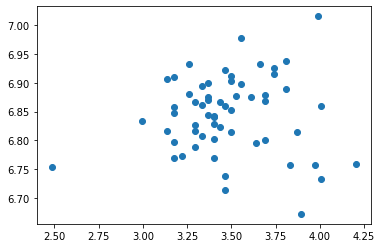

In [60]:

plt.scatter(np.log(df[df.columns[2]]), np.log(np.array(df[df.columns[1]])))

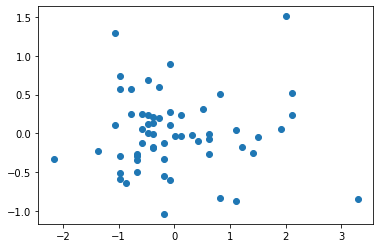

In [61]:
predictions = Xmat.dot(betaVec)
plt.scatter(Xmat[:, 1], y - predictions)

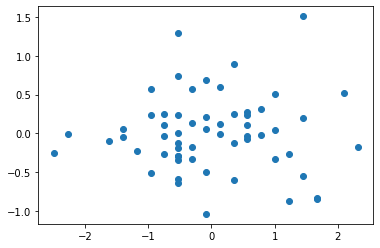

In [62]:
plt.scatter(Xmat[:, 2], y - predictions)

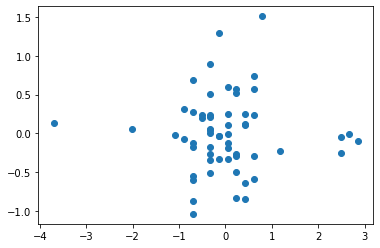

In [63]:
plt.scatter(Xmat[:, 3], y - predictions)

Text(0.5, 1.0, 'X distribution')

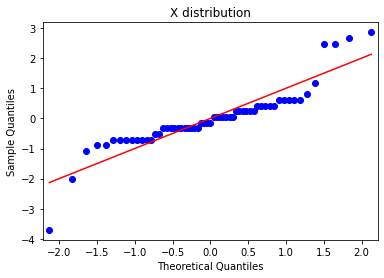

In [64]:
sm.qqplot(Xmat[:, 3], line='s')
plt.title("X distribution")

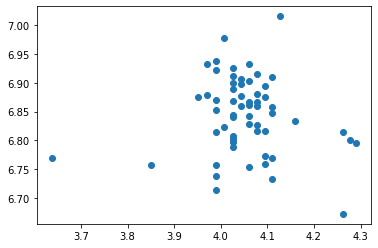

In [65]:
plt.scatter(np.log(df[df.columns[3+1]]), np.log(np.array(df[df.columns[1]])))

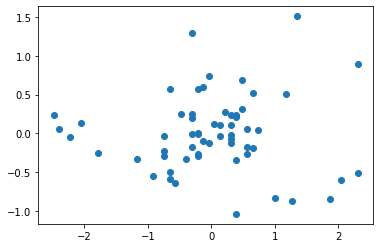

In [66]:
plt.scatter(Xmat[:, 4], y - predictions)

Text(0.5, 1.0, 'X distribution')

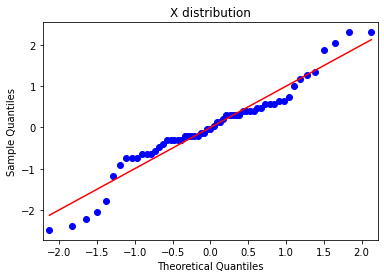

In [67]:
sm.qqplot(Xmat[:, 4], line='s')
plt.title("X distribution")

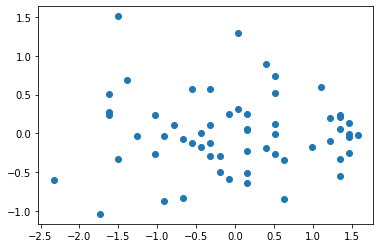

In [68]:
plt.scatter(Xmat[:, 5], y - predictions)

Text(0.5, 1.0, 'X distribution')

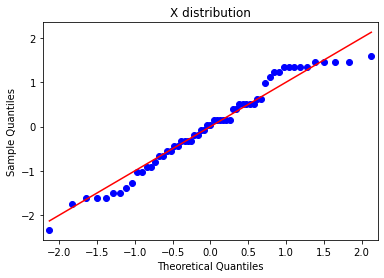

In [69]:
sm.qqplot(Xmat[:, 5], line='s')
plt.title("X distribution")

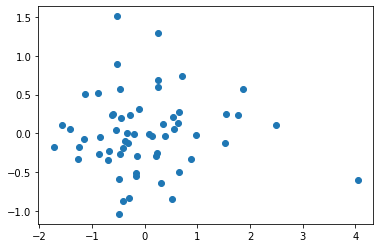

In [70]:
plt.scatter(Xmat[:, 6], y - predictions)

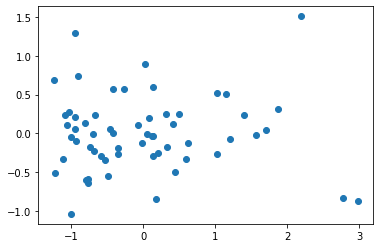

In [71]:
plt.scatter(Xmat[:, 7], y - predictions)

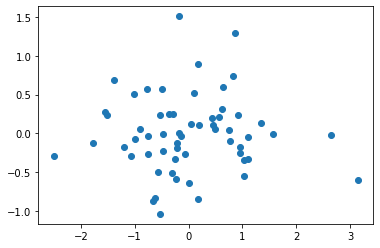

In [72]:
plt.scatter(Xmat[:, 8], y - predictions)

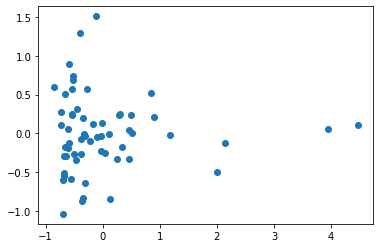

In [73]:
plt.scatter(Xmat[:, 9], y - predictions)

Text(0.5, 1.0, 'X distribution')

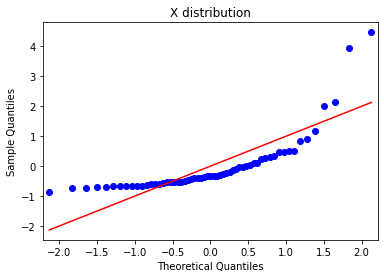

In [74]:
sm.qqplot(Xmat[:, 9], line='s')
plt.title("X distribution")

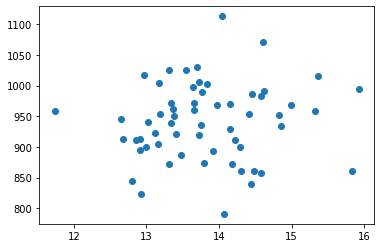

In [75]:
plt.scatter(np.log(df[df.columns[10]]),np.array(df[df.columns[1]]))

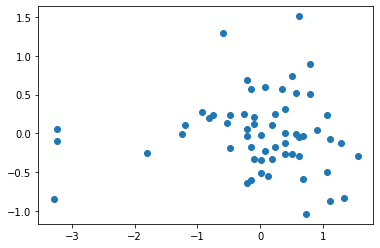

In [76]:
plt.scatter(Xmat[:, 10], y - predictions)

Text(0.5, 1.0, 'X distribution')

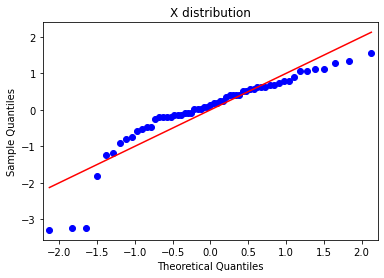

In [77]:
sm.qqplot(Xmat[:, 10], line='s')
plt.title("X distribution")

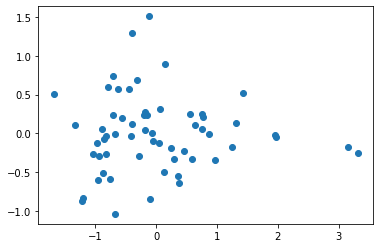

In [78]:
plt.scatter(Xmat[:, 11], y - predictions)

Text(0.5, 1.0, 'X distribution')

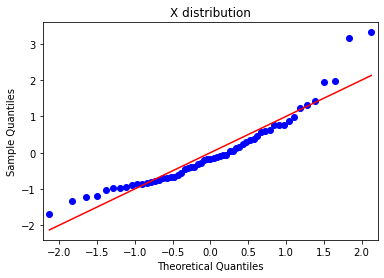

In [79]:
sm.qqplot(Xmat[:, 11], line='s')
plt.title("X distribution")

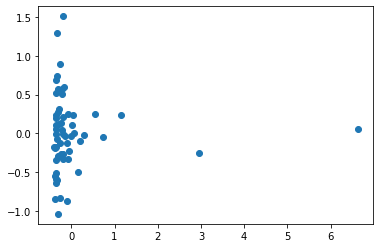

In [80]:
plt.scatter(Xmat[:, 12], y - predictions)

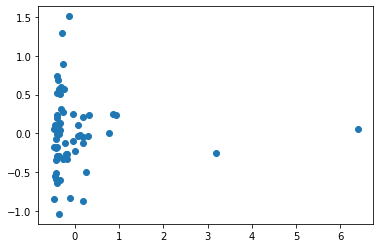

In [81]:
plt.scatter(Xmat[:, 13], y - predictions)

Text(0.5, 1.0, 'X distribution')

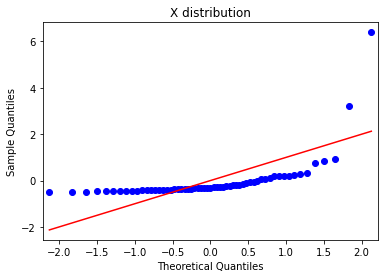

In [82]:
sm.qqplot(Xmat[:, 13], line='s')
plt.title("X distribution")

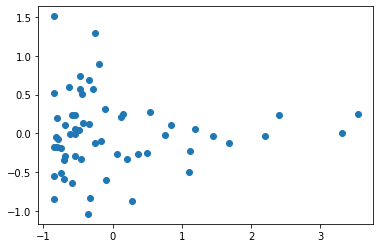

In [83]:
plt.scatter(Xmat[:, 14], y - predictions)

Text(0.5, 1.0, 'X distribution')

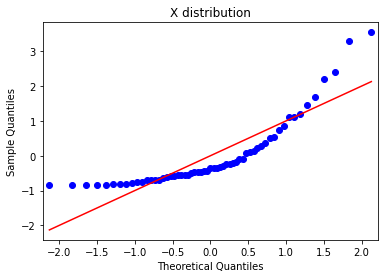

In [84]:
sm.qqplot(Xmat[:, 14], line='s')
plt.title("X distribution")

In [85]:
list_name = ["intercept", "JanTemp", "JulyTemp", "RelHum", "Rain", "Educ", "Dens", "NonWhite", "WhiteCollar", "Pop", "House", "Income", "HC", "NOx", "SO2"]

In [86]:
# 1, 6, 7, 9, 8, 11, 12, 13, 14 fail
# 1, 6, 7, 9, 11, 12, 13, 14 fail
# 9, 12, 13, 14 fail
# 9, 12, 13 fail
# 9, 12, 13, 14 strong candidate but fail
# 1, 6, 7, 11 is week but fail
# 6, 7, 9, 12, 13, 14 fail
# 6, 7, 9, 11, 12, 13, 14 fail
# 1, 6, 7, 9, 12, 13, 14 fail
#  7, 9, 12, 13, 14
a = [7, 9, 12, 13, 14]
for i in a:
  print(list_name[i])

NonWhite
Pop
HC
NOx
SO2


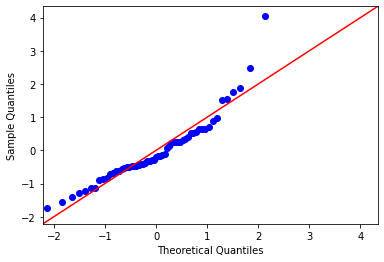

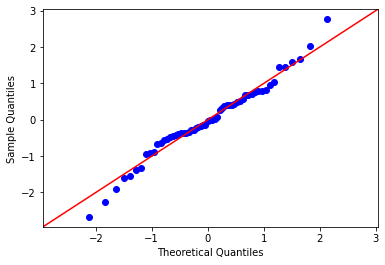

In [87]:
import statsmodels.api as sm

from scipy import stats as ss

import numpy as np

plot = sm.qqplot(df[list_name[6]], ss.norm, fit=True, line='45')

plot = sm.qqplot(np.log(df[list_name[6]]), ss.norm, fit=True, line='45')